<a href="https://colab.research.google.com/github/Victorkehin/BSc109/blob/main/Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Project

In this project, we answer a very important question for all the sitcom fanatics in the world. **Who** is the best director of the office? To solve this question we must look for three main factors: which episodes were most successful, who directed the most episodes, and who had the highest average rating for the episodes directed. Using these three questions and the data compiled we will be able to find the statistically best director.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/Victorkehin/BSc109/main/the_office_imdb%20(1).csv")
df.head()
#shows the dataset that we will use for the ratings


,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,2005-03-24,7.4,7006,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-29,8.3,6902,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.7,5756,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,2005-04-12,8.0,5579,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,2005-04-19,8.4,6183,Michael and his staff challenge the warehouse ...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/Victorkehin/BSc109/main/the_office_series.csv")
df.head()
#this is the data that we will used for the directors and episodes

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


##Check if the data is null


In [ ]:
#Check for nulls
df.isnull().sum()

season               0
episode_num          0
title                0
original_air_date    0
imdb_rating          0
total_votes          0
desc                 0
dtype: int64

1. What episode has the highest rating?

This is an important question because it will show the most successful episodes in the series, and then we can take a look at which directors worked on the best episodes.


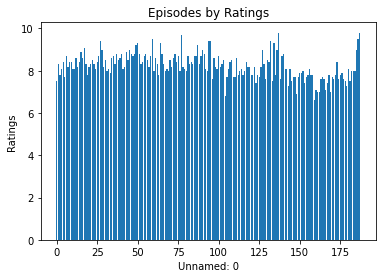

,Unnamed: 0,Ratings
187,187,9.8
137,137,9.8
77,77,9.7
186,186,9.5
59,59,9.5


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling as pp

data = pd.read_csv('https://raw.githubusercontent.com/Victorkehin/BSc109/main/the_office_series.csv', usecols=['Unnamed: 0', 'Ratings'])
df = pd.DataFrame(data)


#dfSorted = df.sort_values('Ratings').reset_index(drop=True)
top_df = df.sort_values('Ratings', ascending=False)
top_df.head()

x = list(df.iloc[:, 0])
y = list(df.iloc[:, 1])
#creates bar chart of all ratings
plt.bar(x, y)
plt.title("Episodes by Ratings")
plt.xlabel("Unnamed: 0")
plt.ylabel("Ratings")
plt.show()
#prints the top 5 highest rated episodes
top_df.head()


#Episode 187 and 137 have the highest ratings.
187: "Suit Warehouse" Directed by Matt Sohn\
137: "Classy Christmas" Directed by Rainn Wilson

Since these are tied for the highest rated episode of the series, it adds some value to the directors due to this success.

2. Which producer directed the most episodes?\
This is an important question to ask, because this can eliminate the possibility that a Director can take the title by only working on one episode, and so we want to eliminate that possible error by looking at the directors that worked on the most episodes to really be sure that our answer has worked on more that one episode which would skew the directors average ratings.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('https://raw.githubusercontent.com/Victorkehin/BSc109/main/the_office_series.csv', usecols=['Director', 'Ratings'])
df = pd.DataFrame(data)
top_df = df.sort_values('Ratings', ascending=False)
#top_df.head()

df['Director'].value_counts().head()

Paul Feig          15
Randall Einhorn    15
Ken Kwapis         13
Greg Daniels       13
Jeffrey Blitz      11
Name: Director, dtype: int64

#Directors Paul Feig and Randall Einhorn have directed the most episodes
Both directors have both worked on 15 episodes in total which tallies up to almost a whole season, which definitely makes them a prime candidate for the best director if they were able to work for so much of the show.

3. Which producer has the highest ratings on average?\
This will help us really distinguish the skill and success of the directors, this also must be looked at with some forsight that some directors may not have worked on the same amount of episodes, and they could only have worked on 1 episode that was just rated high. Therefore we will be looking at the highest rated Director that is within the top 5 of the data from question 2.

In [ ]:
import matplotlib.pyplot as plt
#this takes the ratings as an average among each director and ranks them based on highest average
url = 'https://raw.githubusercontent.com/Victorkehin/BSc109/main/the_office_series.csv'
df = pd.read_csv(url)
df.groupby('Director').agg({'Ratings': 'mean'}).sort_values('Ratings', ascending=False).reset_index(drop=False)


,Director,Ratings
0,Harold Ramis,8.825000
1,Jason Reitman,8.800000
2,Steve Carell,8.766667
3,Paul Feig,8.753333
4,Joss Whedon,8.700000
5,Gene Stupnitsky,8.700000
6,Tucker Gates,8.650000
7,Ken Kwapis,8.607692
8,Julian Farino,8.600000
9,Lee Eisenberg,8.600000


##Charts 
We put the rating into a diagram to clearly show the higfhest ratings.

In [2]:
sns.factorplot(data=df, kind='box', size=4, aspect=2)

NameError: ignored

#The most highly rated director on average is 
Harold Remis averaging 8.825 out of 10 for his episodes directed.


##In conclusion
The most successful director of the office is Paul Feig.\
We arrived at this conclusion by testing a few qualities that are important to being the best director statistically, which we decided was quantity of episodes worked on as well as quality of the episodes worked on. Based on this Paul Feig is the consensus best, because despite the largest sample size out of all directors with 15 episodes directed, he was the 4th best in average ratings out of all directors too. This shows how successful the episodes that he made were and prove that he is the best Director that "The Office" ever had.